In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [8]:
data = pd.read_csv("../Large_data/feature/bnp-paribas-card-claim/train.csv", nrows=50000)
data.shape

(50000, 133)

In [12]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [16]:
#feature selection should be done after data preprocessing
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape
#[col for col in data.columns if data[col].isnull().sum() > 0] #presence of null value

(50000, 114)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=["target","ID"], axis =1),
    data["target"],
    test_size = 0.3,
    random_state = 0
)
del data
X_train.shape, X_test.shape


((35000, 112), (15000, 112))

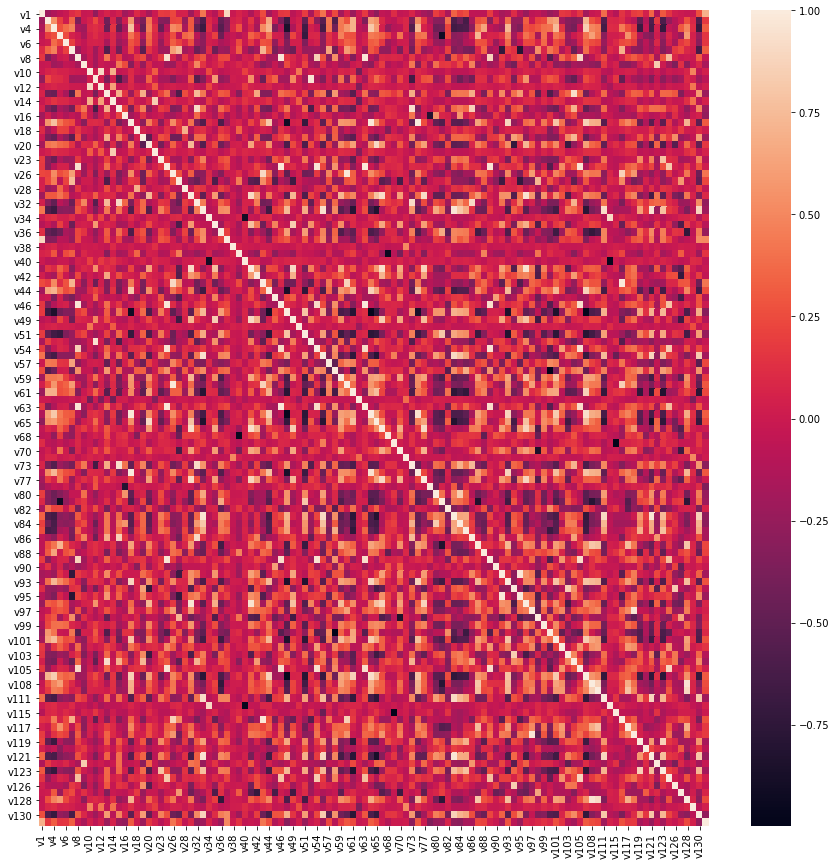

In [20]:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(corrmat)

In [23]:
def corellation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [26]:
corr_feature = corellation(X_train, 0.8)
len(corr_feature)

55

In [27]:
X_train.drop(labels=corr_feature, axis=1, inplace=True)
X_test.drop(labels=corr_feature, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 57), (15000, 57))

In [28]:
data = pd.read_csv("../Large_data/feature/bnp-paribas-card-claim/train.csv", nrows=50000)
data = data[numerical_vars]
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=["target","ID"], axis =1),
    data["target"],
    test_size = 0.3,
    random_state = 0
)
del data
X_train.shape, X_test.shape



((35000, 112), (15000, 112))

In [31]:
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() #absolute value of the corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat>=0.8]
corrmat = corrmat[corrmat<1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat.head(20)

,feature1,feature2,corr
0,v100,v58,0.997974
1,v58,v100,0.997974
2,v115,v69,0.993229
3,v69,v115,0.993229
4,v17,v76,0.992511
5,v76,v17,0.992511
6,v46,v63,0.991521
7,v63,v46,0.991521
8,v64,v17,0.982145
9,v17,v64,0.982145


In [35]:
grouped_features = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_features:
        
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_features = grouped_features + list(
            correlated_block.feature2.unique()
        ) + [feature]
        
        correlated_groups.append(correlated_block)

print('found {} correlated groups' .format(len(correlated_groups)))
print('found {} total features ' .format(X_train.shape[1]))

found 32 correlated groups
found 112 total features 


In [36]:
for group in correlated_groups:
    print(group)
    print()


  feature1 feature2      corr
0     v100      v58  0.997974

  feature1 feature2      corr
2     v115      v69  0.993229

    feature1 feature2      corr
4        v17      v76  0.992511
9        v17      v64  0.982145
107      v17      v48  0.910103
130      v17      v93  0.887841
174      v17     v106  0.854995
218      v17      v44  0.818050
243      v17     v101  0.800001

   feature1 feature2      corr
6       v46      v63  0.991521
10      v46      v25  0.982115
24      v46       v8  0.974733
58      v46     v105  0.944465
72      v46      v89  0.932504
88      v46      v54  0.918355

    feature1 feature2      corr
16       v60      v26  0.980037
148      v60      v43  0.872723
176      v60     v116  0.854290

   feature1 feature2      corr
18      v92      v95  0.978357

   feature1 feature2      corr
28     v114      v40  0.966750
99     v114      v34  0.911422

    feature1 feature2      corr
30       v83     v121  0.966052
35       v83      v33  0.964033
115      v83     v111

In [38]:
group = correlated_groups[2]
group

,feature1,feature2,corr
4,v17,v76,0.992511
9,v17,v64,0.982145
107,v17,v48,0.910103
130,v17,v93,0.887841
174,v17,v106,0.854995
218,v17,v44,0.818050
243,v17,v101,0.800001


In [40]:
from sklearn.ensemble import RandomForestClassifier

features = list(group.feature2.unique())+['v17']
rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=39, verbose=0,
                       warm_start=False)

In [42]:
importnace = pd.concat(
    [pd.Series(feature),
    pd.Series(rf.feature_importances_)], axis=1
)

importnace.columns = ['features','importnace']
importnace.sort_values(by='importnace', ascending=False)

,features,importnace
2,NaN,0.173981
3,NaN,0.154484
6,NaN,0.129764
1,NaN,0.118110
7,NaN,0.117571
4,NaN,0.113958
0,v16,0.108071
5,NaN,0.084062
